In [1]:
import sys
import pandas
import numpy
import matplotlib
import seaborn
import sklearn

print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# load the data 
games = pandas.read_csv('games.csv')

In [4]:
# Get familiar with data
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


<function matplotlib.pyplot.show(*args, **kw)>

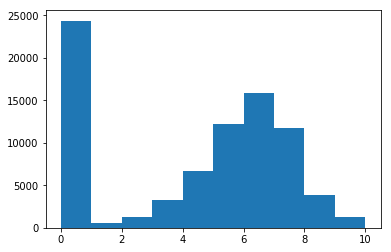

In [5]:
plt.hist(games['average_rating'])
plt.show

In [6]:
# Number of rows with zero and greater than zero users_rated,average_rating
print((games[games['users_rated']==0]).shape)
print((games[games['users_rated']>0]).shape)

print((games[games['average_rating']==0]).shape)
print((games[games['average_rating']>0]).shape)

(24380, 20)
(56932, 20)
(24380, 20)
(56932, 20)


In [7]:
# print the first row of all the games with average_rating zero
print(games[games['average_rating']==0].iloc[0])

# print the first row of all the games with average_rating greater then zero
print(games[games['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [8]:
# Remove rows with users_rates is zero
games = games[games['users_rated']>0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56932 entries, 0 to 81279
Data columns (total 20 columns):
id                      56932 non-null int64
type                    56932 non-null object
name                    56896 non-null object
yearpublished           56930 non-null float64
minplayers              56930 non-null float64
maxplayers              56930 non-null float64
playingtime             56930 non-null float64
minplaytime             56930 non-null float64
maxplaytime             56930 non-null float64
minage                  56930 non-null float64
users_rated             56932 non-null int64
average_rating          56932 non-null float64
bayes_average_rating    56932 non-null float64
total_owners            56932 non-null int64
total_traders           56932 non-null int64
total_wanters           56932 non-null int64
total_wishers           56932 non-null int64
total_comments          56932 non-null int64
total_weights           56932 non-null int64
average_weight  

<function matplotlib.pyplot.show(*args, **kw)>

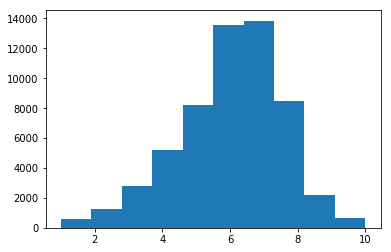

In [9]:
# Dealing with null values
games.info()
games = games.dropna()

# Histograms of average_rating
plt.hist(games['average_rating'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

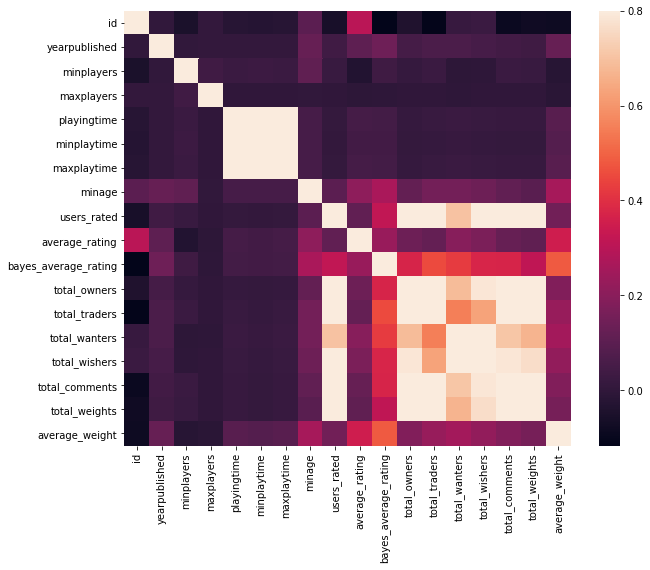

In [10]:
# Correlation matrix 
corrmat = games.corr()
fig = plt.figure(figsize = (10,8))

sns.heatmap(corrmat,vmax = 0.8,square = False)
plt.show

In [37]:
# Create arrays for features and target variable 

x = games.drop(columns = ['id','name','type','average_rating','bayes_average_rating'],axis = 1)
y = games.average_rating

In [39]:
# Generate training and testing datasets 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# Generate prediction on testing data
y_pred = reg.predict(x_test)
print(reg.score(x_test,y_test))
# Compute errors between actual and predicted values 
mean_squared_error(y_pred,y_test)

0.15639760487337895


2.0878654278597413

In [50]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 10,random_state = 1)

RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [51]:
y_pred_rfr = RFR.predict(x_test)

mean_squared_error(y_pred_rfr,y_test)

1.4575588917181705

In [56]:
rating_reg = reg.predict(x_test.iloc[12].values.reshape(1,-1))
rating_RFR = RFR.predict(x_test.iloc[12].values.reshape(1,-1))

print(rating_reg)
print(rating_RFR)


[5.90177516]
[5.38558851]


In [55]:
y_test.iloc[12]

5.3173900000000005